In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/ygrene/수방이작업실/

/content/drive/.shortcut-targets-by-id/1PK1OaPryLfu2eB3iega5z40yHx_idzuf/ygrene/수방이작업실


In [3]:
import numpy as np 
import pandas as pd
from time import time 
import pprint

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./wind_baseline_KNN.csv')
data_x = data[data['datetime'] < '2022-05-01']
data_y = data_x['target']
data_x = data_x.iloc[:,2:]

test_x = data[(data['datetime'] >= '2022-05-01') & (data['datetime'] < '2022-07-01')]
test_x.drop(['datetime','target'], axis=1, inplace=True)

In [23]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data_x, data_y, test_size=0.1, random_state=1234)

In [72]:
train_x.shape, val_x.shape

((12916, 16), (1436, 16))

In [24]:
val_x

,temperature,humidity,rain,vapor_hPa,spot_hPa,sea_hPa,cloud,floor_temp,hour,month,day,Wx,Wy,DP,hour_mean_temp,month_mean_temp
9358,23.6,96.0,0.0,27.9,1014.1,1022.2,1.0,21.8,22,10,4,-1.597477,-5.814342e-01,22.923798,13.041168,16.411022
8120,22.7,99.0,1.0,27.2,998.5,1006.5,10.0,25.3,8,8,14,0.400000,0.000000e+00,22.534324,11.149102,25.795296
2585,8.4,44.0,0.0,4.9,1015.4,1024.0,5.0,6.9,17,12,26,0.578509,6.894400e-01,-3.166600,17.067216,3.358871
11898,1.0,30.0,0.0,2.0,1017.5,1026.4,0.0,0.3,18,1,18,0.707066,8.426489e-01,-14.673904,15.957635,1.495296
5968,20.9,99.0,1.0,24.4,992.1,1000.1,10.0,22.2,16,5,16,-0.923454,-2.537170e+00,20.736560,17.790868,18.827218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,1.7,59.0,0.0,4.1,1017.4,1026.3,0.0,-3.4,22,12,25,0.469846,1.710101e-01,-5.466326,13.041168,3.358871
2785,-1.2,70.0,0.0,3.9,1024.5,1033.5,7.0,-0.1,1,1,4,0.919253,-7.713451e-01,-5.976707,11.835629,1.495296
7250,24.2,99.0,1.0,29.8,997.4,1005.3,10.0,25.0,2,7,9,0.200000,0.000000e+00,24.032450,11.480090,27.046371
6663,26.6,63.0,0.0,21.8,997.2,1005.1,9.0,36.6,15,6,14,-3.200000,3.918870e-16,18.975328,18.029790,23.562153


In [26]:
from sklearn.preprocessing import  MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(train_x)
train_x_scaled = mm_scaler.transform(train_x)
val_x_scaled = mm_scaler.transform(val_x)
test_x_scaled = mm_scaler.transform(test_x)

train_y = np.array(train_y)
val_y = np.array(val_y)

In [7]:
def NMAE(true, pred, nominal=16000):
    absolute_error = np.abs(true - pred)
    absolute_error /= nominal
    target_idx = np.where(true >= nominal*0.1)
    return 100 * np.array([absolute_error[i] for i in target_idx]).mean()

In [8]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import Lars, LassoLars, OrthogonalMatchingPursuit
from sklearn.linear_model import BayesianRidge, ARDRegression, PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [ ]:
# seed=1234

# estimator1 = ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
#                     max_depth=None, max_features='auto', max_leaf_nodes=None,
#                     max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,
#                     min_samples_split=2, min_weight_fraction_leaf=0.0,
#                     n_estimators=100, n_jobs=-1, oob_score=False,
#                     random_state=seed, verbose=0, warm_start=False)


# estimator2 = CatBoostRegressor(verbose=False, random_state=seed)


# estimator3 = XGBRegressor(colsample_bytree=0.6415793241883597, learning_rate=0.15320099356299727, max_depth=7,
# objective='reg:squarederror', reg_alpha=88.60888114780245, reg_lambda=100.0,
# subsample=0.8617676065521055, random_state=seed)


# estimator4 = RandomForestRegressor(n_jobs=-1, random_state=seed)


# estimator5 = LGBMRegressor(reg_alpha=1.9553084407319181, reg_lambda=0.553232604674336,
# colsample_bytree=0.7,subsample=0.7, learning_rate=0.04133195223035414, max_depth=15,
# num_leaves=336, min_child_samples=100, cat_smooth=24, random_state=seed)


# estimator6 = KNeighborsRegressor(n_jobs=-1)

In [62]:
seed=1234

estimator1 = ExtraTreesRegressor(random_state=seed)

estimator2 = CatBoostRegressor(verbose=False, random_state=seed)

estimator3 = XGBRegressor(reg_lambda=0.9636539443606752, reg_alpha=0.76227778805925, colsample_bytree=0.5, 
                          subsample=0.8, learning_rate=0.014, max_depth=15, random_state=seed, min_child_weight=100,
                        n_estimators=1000, metrics='rmse')

estimator4 = RandomForestRegressor(n_jobs=-1, random_state=seed)

estimator5 = LGBMRegressor(colsample_bytree=0.8, learning_rate=0.008760492503745693,
              max_depth=7, min_child_samples=445, n_estimators=2815,
              num_leaves=730, reg_alpha=0.5613079727086914,
              reg_lambda=0.5469209137093743, subsample=0.9970953576797487, random_state=seed)

estimator6 = KNeighborsRegressor()

In [63]:
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_absolute_error 

def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):

    kf = KFold(n_splits=n_folds, shuffle=False)

    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):

        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        model.fit(X_tr , y_tr)       

        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)

        test_pred[:, folder_counter] = model.predict(X_test_n)
            

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    

    return train_fold_pred , test_pred_mean

In [64]:
es1_train, es1_test = get_stacking_base_datasets(estimator1, train_x_scaled, train_y, val_x_scaled, 7)
es2_train, es2_test = get_stacking_base_datasets(estimator2, train_x_scaled, train_y, val_x_scaled, 7)
es3_train, es3_test = get_stacking_base_datasets(estimator3, train_x_scaled, train_y, val_x_scaled, 7)
es4_train, es4_test = get_stacking_base_datasets(estimator4, train_x_scaled, train_y, val_x_scaled, 7)
es5_train, es5_test = get_stacking_base_datasets(estimator5, train_x_scaled, train_y, val_x_scaled, 7)
es6_train, es6_test = get_stacking_base_datasets(estimator6, train_x_scaled, train_y, val_x_scaled, 7)

ExtraTreesRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
CatBoostRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[06:54:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[06:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[06:54:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[06:55:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[06:55:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now

In [65]:
Stack_final_X_train = np.concatenate((es1_train, es2_train, es3_train, es4_train, es5_train, es6_train), axis=1)
Stack_final_X_test = np.concatenate((es1_test, es2_test, es3_test, es4_test, es5_test, es6_test), axis=1)
print('원본 학습 피처 데이터 Shape:',train_x_scaled.shape, '원본 검증 피처 Shape:',val_x_scaled.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 검증 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (12916, 16) 원본 검증 피처 Shape: (1436, 16)
스태킹 학습 피처 데이터 Shape: (12916, 6) 스태킹 검증 피처 데이터 Shape: (1436, 6)


In [66]:
from sklearn.linear_model import LinearRegression
lr_final = LinearRegression()
lr_final.fit(Stack_final_X_train, train_y)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(NMAE(val_y, stack_final, 16000)))

최종 메타 모델의 예측 정확도: 7.6114


In [67]:
stack_final = lr_final.predict(Stack_final_X_train)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(NMAE(train_y, stack_final, 16000)))

최종 메타 모델의 예측 정확도: 7.6225


# 추론

In [68]:
es1_train, es1_test = get_stacking_base_datasets(estimator1, train_x_scaled, train_y, test_x_scaled, 7)
es2_train, es2_test = get_stacking_base_datasets(estimator2, train_x_scaled, train_y, test_x_scaled, 7)
es3_train, es3_test = get_stacking_base_datasets(estimator3, train_x_scaled, train_y, test_x_scaled, 7)
es4_train, es4_test = get_stacking_base_datasets(estimator4, train_x_scaled, train_y, test_x_scaled, 7)
es5_train, es5_test = get_stacking_base_datasets(estimator5, train_x_scaled, train_y, test_x_scaled, 7)
es6_train, es6_test = get_stacking_base_datasets(estimator6, train_x_scaled, train_y, test_x_scaled, 7)

ExtraTreesRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
CatBoostRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
[06:59:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  1  시작 
[06:59:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  2  시작 
[06:59:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  3  시작 
[07:00:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	 폴드 세트:  4  시작 
[07:00:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now

In [69]:
Stack_final_X_train = np.concatenate((es1_train, es2_train, es3_train, es4_train, es5_train, es6_train), axis=1)
Stack_final_X_test = np.concatenate((es1_test, es2_test, es3_test, es4_test, es5_test, es6_test), axis=1)
print('원본 학습 피처 데이터 Shape:',train_x_scaled.shape, '원본 검증 피처 Shape:',test_x_scaled.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 검증 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (12916, 16) 원본 검증 피처 Shape: (1464, 16)
스태킹 학습 피처 데이터 Shape: (12916, 6) 스태킹 검증 피처 데이터 Shape: (1464, 6)


In [70]:
from sklearn.linear_model import LinearRegression
meta_model = LinearRegression()
meta_model.fit(Stack_final_X_train, train_y)
prediction = meta_model.predict(Stack_final_X_test)

In [71]:
stack_final = meta_model.predict(Stack_final_X_train)
print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(NMAE(train_y, stack_final, 16000)))

최종 메타 모델의 예측 정확도: 7.6225


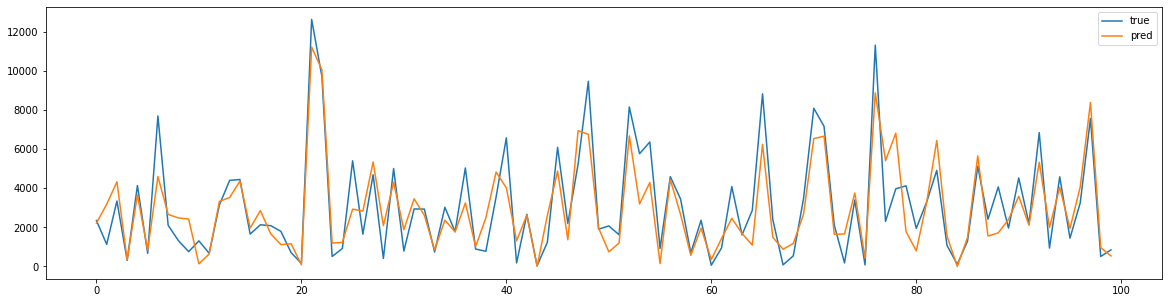

In [60]:
plt.figure(figsize=(20,5))
plt.plot(train_y[:100], label='true')
plt.plot(stack_final[:100], label='pred')
plt.legend()
plt.show()

# 제출

In [61]:
prediction_pred = pd.DataFrame(prediction)

prediction_pred.to_csv('./predict_answer/wind_baseline_stack_0822_1.csv')